In [1]:
#Source of Dataset - https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#

#About Data
# NASA data set obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil 
# blade sections conducted in an anechoic wind tunnel.
# The data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. 
# the span of the airfoil and the observer position were the same in all of the experiments

#Objective
# Predict Scaled Sound Pressure Level given the attributes correspoding to the experiment.

In [2]:
#Load Modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Set Directory
os.chdir("path_to_directory")

In [4]:
#Load data
data = pd.read_csv("Data.csv")
data.head() #view snapshot of data

,Frequency,Angle_of_Attack,Chord_Length,Free_Stream_Velocity,Suction_Side_Displacement,Scaled_Sound_Pressure_Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
#Basic information about data
data.info()
# There are 1503 observations 
# no missing values present in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
Frequency                      1503 non-null int64
Angle_of_Attack                1503 non-null float64
Chord_Length                   1503 non-null float64
Free_Stream_Velocity           1503 non-null float64
Suction_Side_Displacement      1503 non-null float64
Scaled_Sound_Pressure_Level    1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [6]:
#Exploratory Analysis
##Univariate Analysis

#get data summary
data.describe()
# This informs us about the distribution of each variable

,Frequency,Angle_of_Attack,Chord_Length,Free_Stream_Velocity,Suction_Side_Displacement,Scaled_Sound_Pressure_Level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


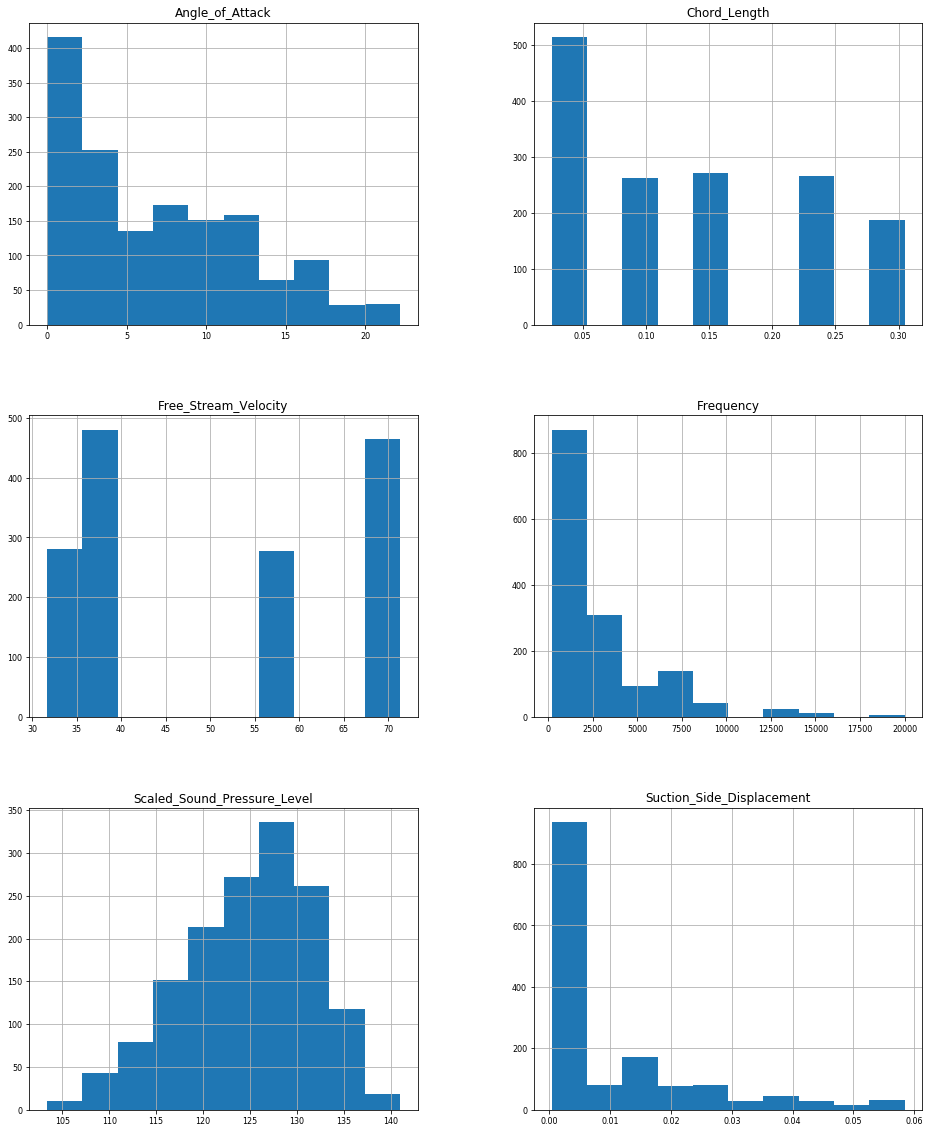

In [7]:
#Histogram
data.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

# most of the variables seem right skewed but scaled_sound_pressure_level has left skewed normal distribution
# Also, some variables like chord_length attain values in certain intervals


In [9]:
##Bivariate Analysis
corr_matrix = data.corr()
corr_matrix

# As suspected from the distribution, we have negative correlation for most of the variables with the dependent variable
# also, there is good correlation between Angle_of_Attack and Suction_Side_Displacement

,Frequency,Angle_of_Attack,Chord_Length,Free_Stream_Velocity,Suction_Side_Displacement,Scaled_Sound_Pressure_Level
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle_of_Attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord_Length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free_Stream_Velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Suction_Side_Displacement,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Scaled_Sound_Pressure_Level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


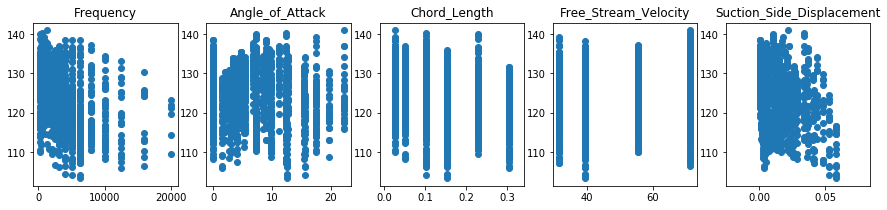

In [10]:
#Scatter Plots

fig, axes = plt.subplots(1, 5, figsize=(15,3))

for i in range(5):
    axes[i].scatter(data.iloc[:,i], data["Scaled_Sound_Pressure_Level"])
    axes[i].set_title(data.columns[i])
    
# There does not seem to be a clear linear relationship present 
# There is no obvious transformation from the plots that would give us linear relationship

In [11]:
#split data into dependent and independent variables
X = data.drop(['Scaled_Sound_Pressure_Level'],axis=  1)
Y = data.loc[:, "Scaled_Sound_Pressure_Level"].values

In [12]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [13]:
#Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)

#Getting Fitted values from model
y_fitted = regressor.predict(X_train)

In [15]:
#model evaluation train
from sklearn.metrics import mean_squared_error, r2_score

rmse_train = mean_squared_error(y_train, y_fitted)
r2_train = r2_score(y_train, y_fitted)
adj_r2_train = 1 - float(len(y_train)-1)/(len(y_train)-len(regressor.coef_)-1)*(1 - r2_train)

print('Coefficients:' ,regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Root mean squared error: ', rmse_train)
print('R2 score: ', r2_train)
print('Adj R2 score: ', adj_r2_train)

# R2 value is pretty low owing to not so strong linear relationshipspresent in the data

Coefficients: [-1.28041334e-03 -4.10769342e-01 -3.60326340e+01  9.81537999e-02
 -1.44109711e+02]
Intercept: 132.8456572124818
Root mean squared error:  23.618448776410744
R2 score:  0.5047490146008985
Adj R2 score:  0.5026785673375243


In [16]:
#model evaluation test
from sklearn.metrics import mean_squared_error, r2_score

rmse_test = mean_squared_error(y_test, y_pred)

print('Root mean squared error: ', rmse_test)

# Test RMSE is slightly lesser than train RMSE suggesting model is not overfitting

Root mean squared error:  20.765101495623412


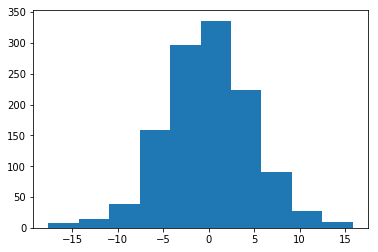

In [17]:
#Assumptions Testing

#1 - Linearity - We already checked for linear relationship in exploratory analsyis above
#2 - Normality of Residuals

residuals = y_train - y_fitted

plt.hist(residuals,bins = 10)
plt.show()
# Residuals are following Normal Distribution

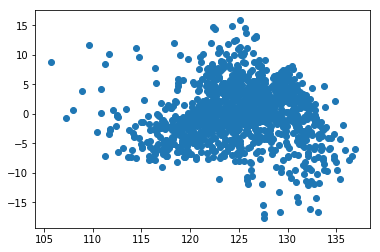

In [18]:
#3 - Homoscedasticity (Constant Variance)

plt.scatter(y_fitted,residuals)
plt.show()
# There does not seem to be any pattern in the plot, also, it seems like a constant variance plot

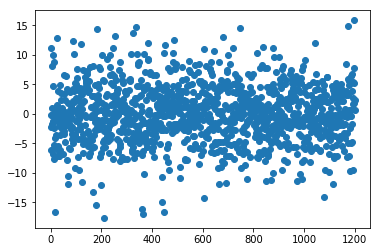

In [19]:
#4 - Independence of Residuals

plt.scatter(range(residuals.shape[0]),residuals)
plt.show()
# The plot is completely random and no pattern can be found

In [20]:
# Hence, all the assumptions are passed. 
# There is lot of scope of improvements in the model with some variable transformation 
# and if any domain knowledge can be applied.